In [197]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline() # Use Plotly locally

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [198]:
df = pd.read_csv('merged_rental_hyderabad.csv')

In [199]:
df['property_type'].value_counts()

Apartment                  5964
Residential House          2708
Builder Floor Apartment     880
Villa                       297
Penthouse                    70
Studio Apartment             40
Service Apartment            16
Name: property_type, dtype: int64

In [200]:
df['bedrooms'].value_counts()

2.0     4908
3.0     3327
1.0     1288
4.0      274
5.0       64
6.0       13
10.0       8
7.0        4
9.0        3
Name: bedrooms, dtype: int64

In [201]:
filt = (df['property_type']=='Apartment')
df = df.loc[filt]

In [202]:
df['bedrooms'].value_counts()

2.0     2831
3.0     2614
1.0      366
4.0      114
5.0        6
10.0       3
6.0        1
Name: bedrooms, dtype: int64

In [203]:
fur_grp = df.groupby('furnish_status')
fur_rents = fur_grp['price'].mean()
fur_rents = dict(fur_rents)
list1 = fur_rents.keys()
list2 = fur_rents.values()
furrents_df = pd.DataFrame(list(zip(list1,list2)), columns=['furnish_type','mean_rent'])
furrents_df['mean_rent'] = furrents_df['mean_rent'].astype(int)

fig = px.bar(furrents_df,x='furnish_type', y='mean_rent', text='mean_rent',
            labels={'mean_rent':'Average Rent'}, color='mean_rent', color_continuous_scale = 'viridis') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Average Rents: Apartments (by Furnished Status)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Average Rent (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [204]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
mean_list = []

for i in range(7,10):
    filt = (df['date_posted'].dt.month==i)
    df_new = df.loc[filt]
    mean_list.append(df_new['price'].mean())

mean_list = list(map(int,mean_list))    
mean_names = ['July 2021', 'August 2021','September 2021']

fig = go.Figure()

fig.add_trace(go.Bar(
    x= mean_names,
    y= mean_list,
    name='Average Rent Value',
    marker_color='RoyalBlue',
    text=mean_list)
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Monthly Trends: Average Rents (Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Month',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Average Rent (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [205]:
prop = df['marital_status_pref'].value_counts()
prop = dict(prop)

fig = px.pie(values=list(prop.values()), names=list(prop.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Hot)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.update_layout(title_text="<b>Tenants Preferred (Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [207]:
project_df = df.dropna()
project_df['pro_loc'] = project_df['project'] + ':' + project_df['locality']
project_grp = project_df.groupby('pro_loc')
project_rents = project_grp['price'].mean()
project_rents = dict(project_rents)
list1 = project_rents.keys()
list2 = project_rents.values()
projectrents_df = pd.DataFrame(list(zip(list1,list2)), columns=['project','mean_rent'])
projectrents_df['mean_rent'] = projectrents_df['mean_rent'].astype(int)

fig = px.bar(projectrents_df[0:20],y='project', x='mean_rent', text='mean_rent',orientation='h',
            labels={'mean_rent':'Average Rent'}, color='mean_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Average Rents by Project (Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.63,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Average Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Project',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)


In [208]:
loc_df = df.loc[df['loc_count']>=20]
loc_grp = loc_df.groupby('locality')
loc_rents = loc_grp['price'].mean()
loc_rents = dict(loc_rents)

list1 = list(loc_rents.keys())
list2 = list(loc_rents.values())
list2 = [int(i) for i in list2]

loc_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','average_rent'])
loc_df.sort_values(by='average_rent',inplace=True)

fig = px.bar(loc_df[0:20],y='locality', x='average_rent', text='average_rent',orientation='h',
            labels={'average_rent':'Average Rent'}, color='average_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Most Affordable Locations (Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total descending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Average Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [213]:
loc_df = df.loc[df['loc_count']>=10]
loc_grp = loc_df.groupby('locality')
loc_rents = loc_grp['price'].median()
loc_rents = dict(loc_rents)

list1 = list(loc_rents.keys())
list2 = list(loc_rents.values())
list2 = [int(i) for i in list2]

loc_df = pd.DataFrame(list(zip(list1,list2)), columns=['locality','median_rent'])
loc_df.sort_values(by='median_rent',ascending=False,inplace=True)

fig = px.bar(loc_df[0:20],y='locality', x='median_rent', text='median_rent',orientation='h',
            labels={'median_rent':'Median Rent'}, color='median_rent', color_continuous_scale = 'Turbo') 

fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b>Most Expensive Locations (Apartments)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.63,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Median Rent (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [211]:
df1 = df.loc[df['bedrooms']==2.0]
fur_grp = df1.groupby('furnish_status')
fur_rents = fur_grp['price'].median()
fur_rents = dict(fur_rents)
fur_types2 = list(fur_rents.keys())
fur_values2 = list(fur_rents.values())
fur_values2 = [int(i) for i in fur_values2]

df2 = df.loc[df['bedrooms']==3.0]
fur_grp = df2.groupby('furnish_status')
fur_rents = fur_grp['price'].median()
fur_rents = dict(fur_rents)
fur_types3 = list(fur_rents.keys())
fur_values3 = list(fur_rents.values())
fur_values3 = [int(i) for i in fur_values3]

df3 = df.loc[df['bedrooms']==4.0]
fur_grp = df3.groupby('furnish_status')
fur_rents = fur_grp['price'].median()
fur_rents = dict(fur_rents)
fur_types4 = list(fur_rents.keys())
fur_values4 = list(fur_rents.values())
fur_values4 = [int(i) for i in fur_values4]

df4 = df.loc[df['bedrooms']==1.0]
fur_grp = df4.groupby('furnish_status')
fur_rents = fur_grp['price'].median()
fur_rents = dict(fur_rents)
fur_types1 = list(fur_rents.keys())
fur_values1 = list(fur_rents.values())
fur_values1 = [int(i) for i in fur_values1]

fig = go.Figure(data=[
    go.Bar(name='1 BHK', x=fur_types1, y=fur_values1,text=fur_values1),
    go.Bar(name='2 BHK', x=fur_types2, y=fur_values2,text=fur_values2),
    go.Bar(name='3 BHK', x=fur_types3, y=fur_values3,text=fur_values3),
    go.Bar(name='4 BHK', x=fur_types4, y=fur_values4,text=fur_values4)
])
fig.update_layout(barmode='group')

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Median Rents by Furnished Status (Apartments))</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
fig.show()

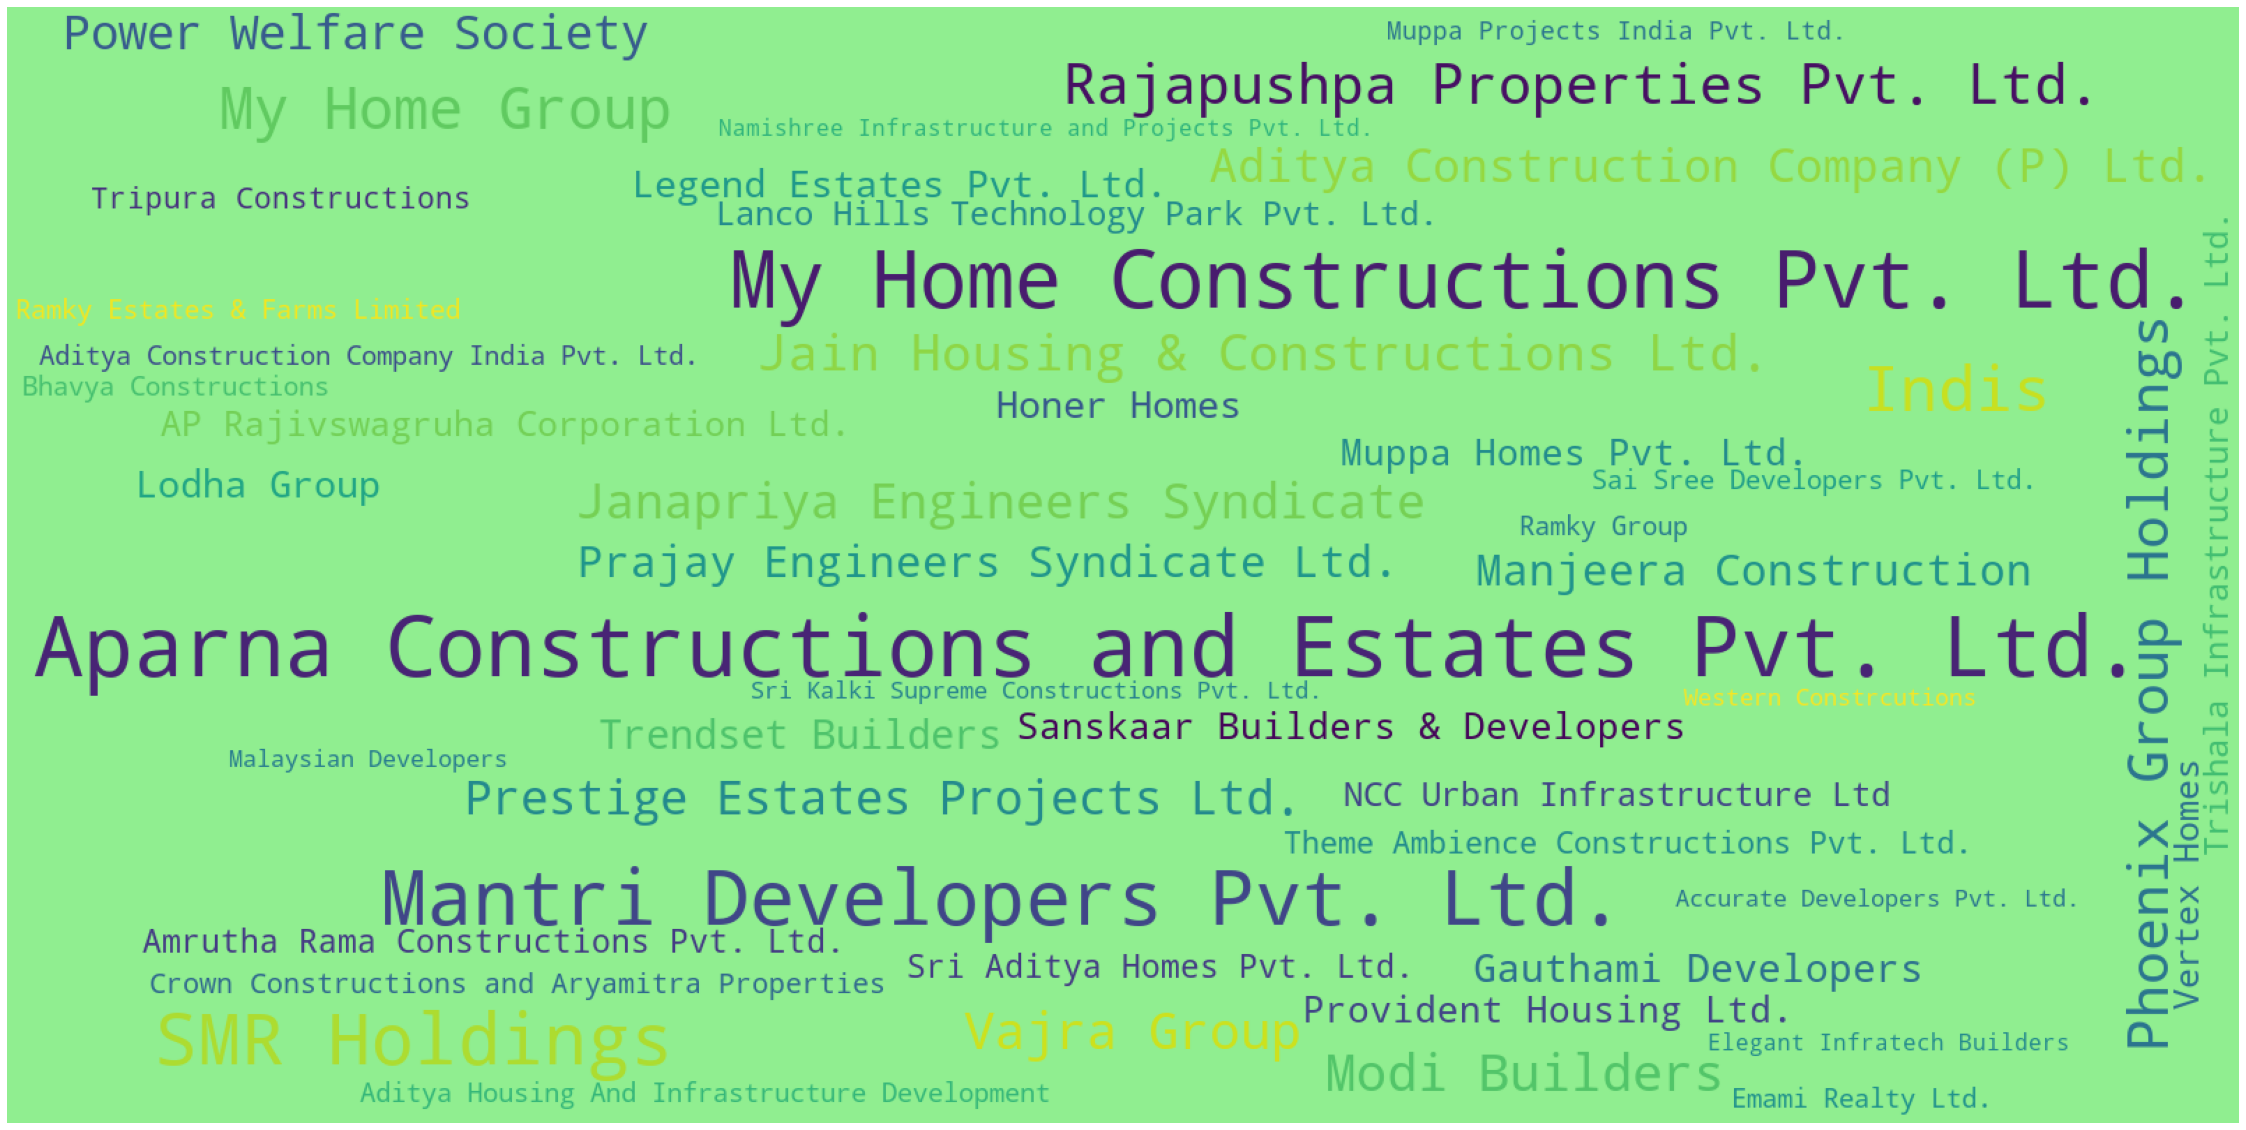

In [212]:
df['builder'] = df['builder'].replace(np.nan,'',regex=True)
builder_list = df['builder'].values.tolist()

count = Counter(builder_list)
wordcloud = WordCloud(width = 1600, height = 800,background_color='lightgreen',max_words=50)\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 